# Made by: Chetan, AIT AIML 1, 18BCS6056

In [22]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv(r"C:\Users\JMD\OneDrive\Desktop\cricket.csv",encoding='latin-1') # Reading the dataset

In [24]:
print(data.head(5),'\n') # For Training set
data.head(5)             # For validation set

                        Player       Span  Mat  Inns  NO   Runs   HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234  169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704  164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430  189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650  144  33.37   

      BF     SR  100  50   0  
0  21367  86.23   49  96  20  
1  18048  78.86   25  93  15  
2  17046  80.39   30  82  20  
3  14725  91.20   28  68  34  
4  16020  78.96   19  77  28   



,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [25]:
print('|| For Training set ||', '\n',data.nunique()) #to print number of unique values of dataset

|| For Training set || 
 Player    79
Span      65
Mat       62
Inns      69
NO        42
Runs      79
HS        52
Ave       77
BF        79
SR        77
100       28
50        41
0         22
dtype: int64


In [26]:
print("Are there any null values: ",data.isnull().values.any(),'\n')          # Check if there are any null values in the dataset
print(data.isnull().sum())                      # If there are any null values print the total sum of null values in each column

Are there any null values:  False 

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64


In [27]:
data.shape

(79, 13)

In [28]:
data.drop_duplicates(keep='first',inplace=True)  # Dropping duplicate values to remove redundancy

In [29]:
data.shape # as the values are same means there are no duplicate values

(79, 13)

<AxesSubplot:>

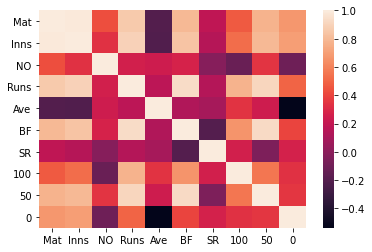

In [9]:
sns.heatmap(data.corr())
# from here we can see correlation b/w different attributes, white is highly correclated and black is least correlated

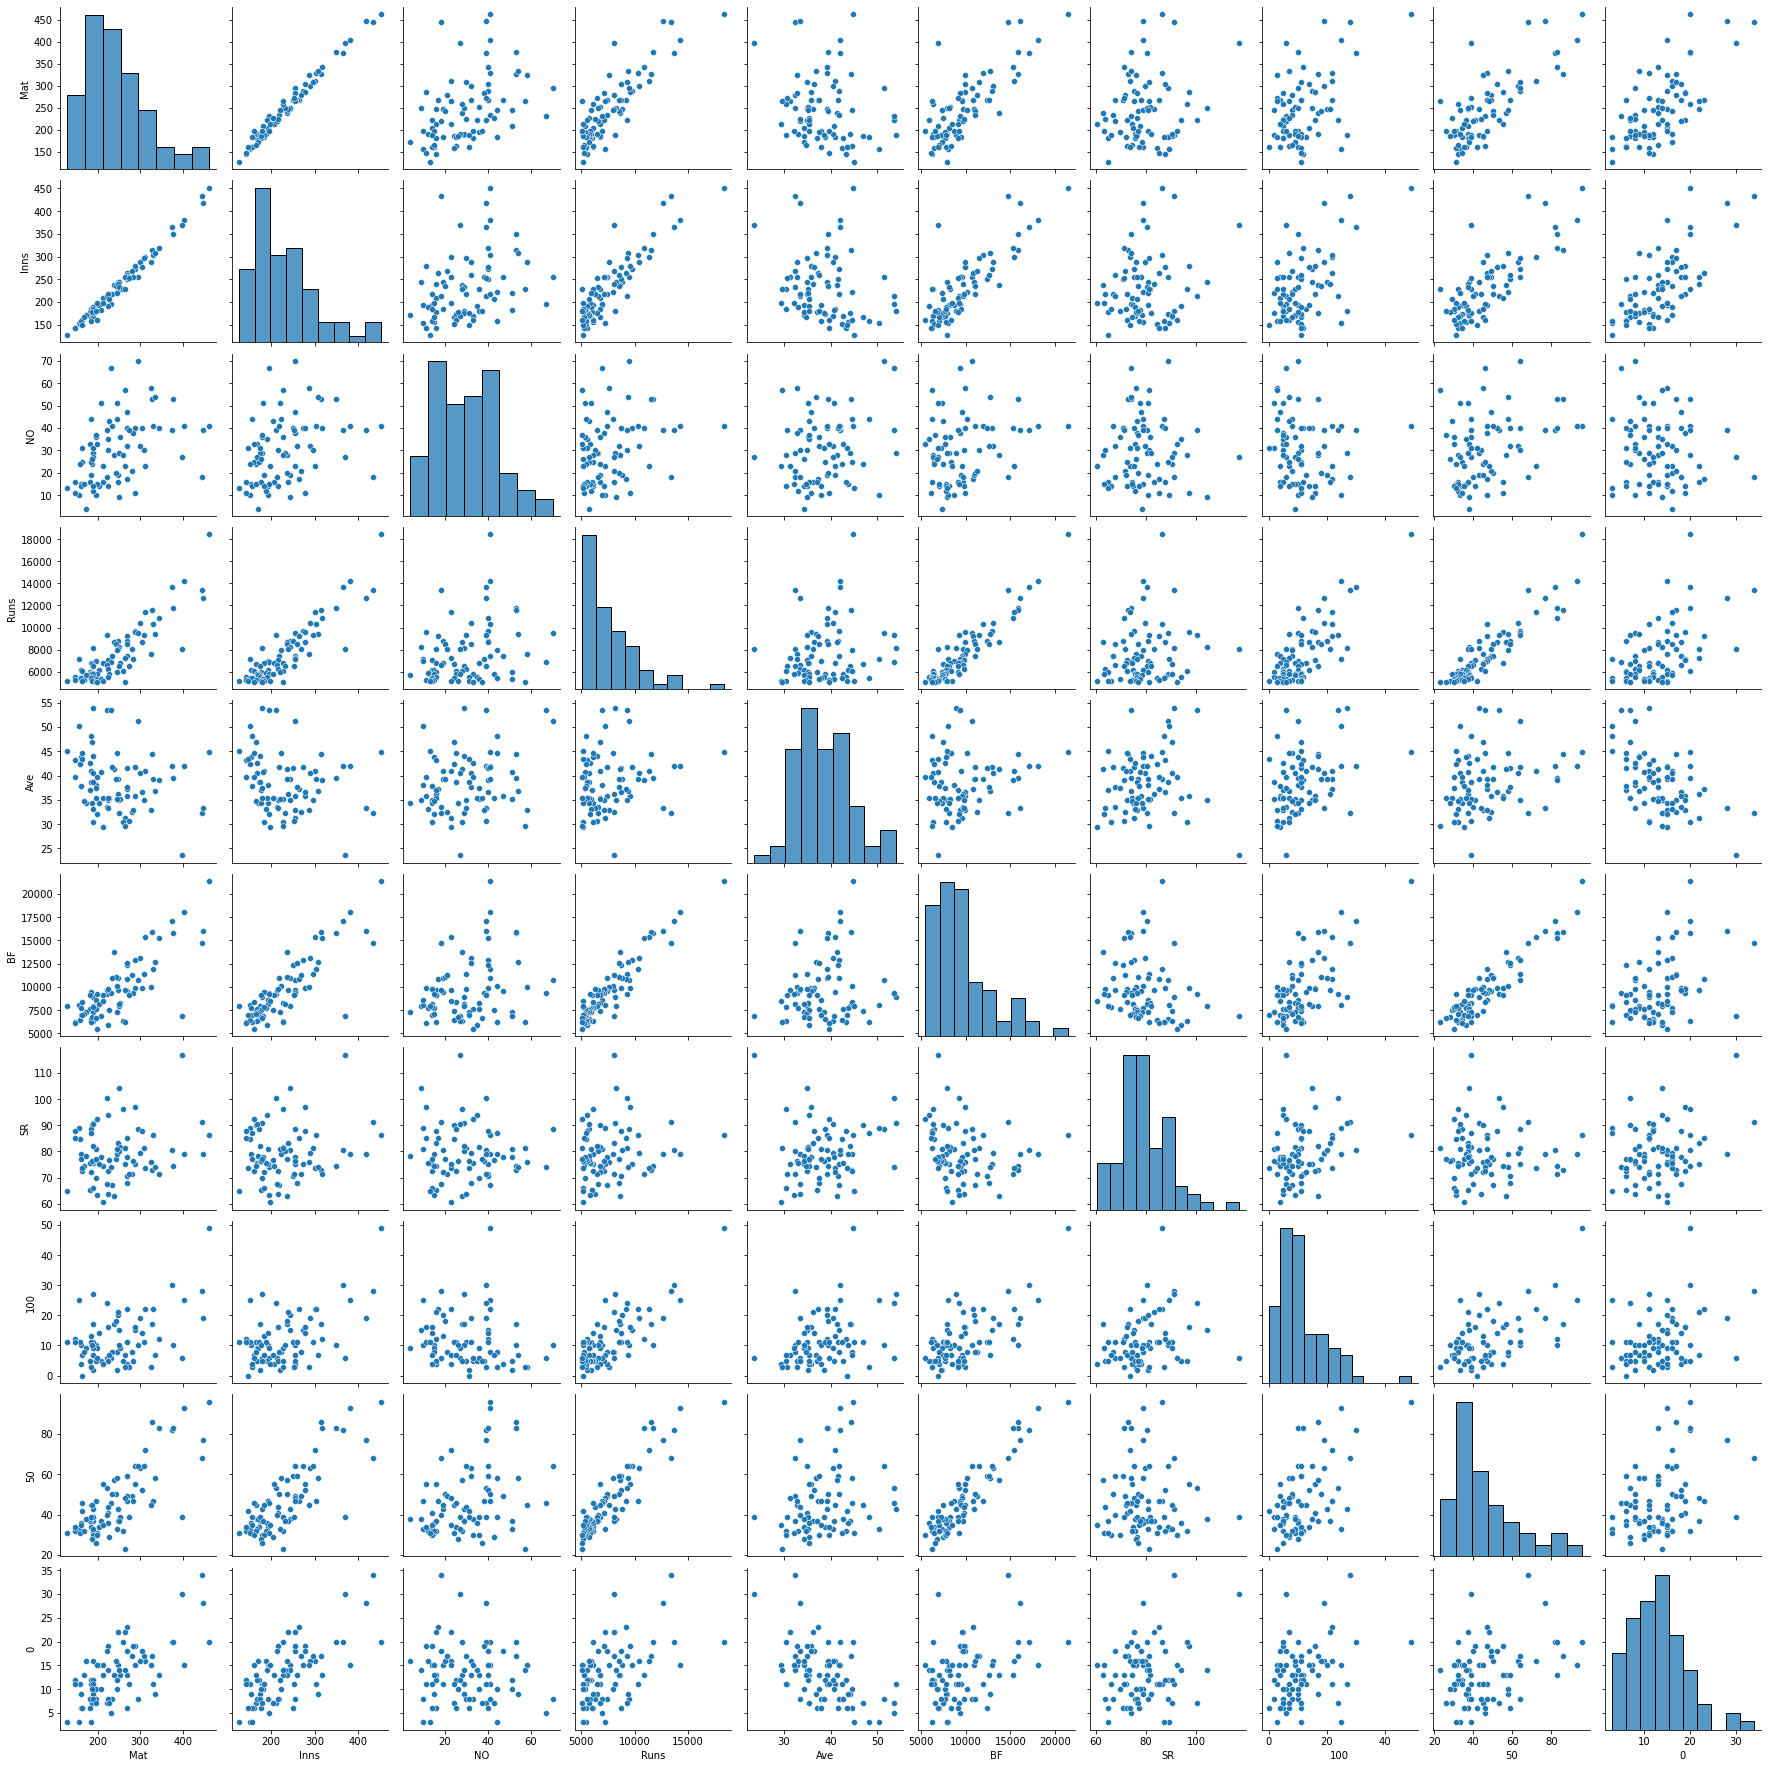

In [13]:
sns.pairplot(data)#    sns.pairplot(data,corner=True,diag_kind="kde")

In [30]:
data1 = data.drop(['Player','Span'],axis=1)

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [32]:
scaler = MinMaxScaler()
data1 = scaler.fit_transform(data1)

# Model building

# K means Clustering

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

For n_clusters=2, the silhouette score is 0.3585373683905276
For n_clusters=3, the silhouette score is 0.22523391044740249
For n_clusters=4, the silhouette score is 0.17516480269826623
For n_clusters=5, the silhouette score is 0.19826615098668293
For n_clusters=6, the silhouette score is 0.1867720933934478
For n_clusters=7, the silhouette score is 0.20184328815046318


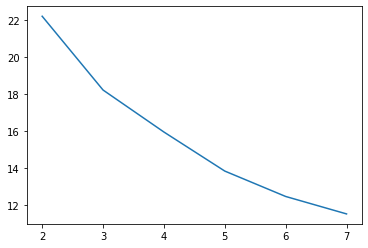

In [48]:
clus = range(2,8)
clus_list = []
for clus_num in range(2,8):
    model = KMeans(n_clusters = clus_num, max_iter=150,random_state= 50)
    model.fit(data1)
    clus_list.append(model.inertia_)
    clus_labels = model.labels_
    silhouette_avg = silhouette_score(data1, clus_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(clus_num, silhouette_avg))

plt.plot(clus,clus_list)
# below the curve is at 3 that means 3 clusters will be fine and silhouette score says 2 clusters will be good

In [55]:
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 15)
cluster.fit(data1)

KMeans(max_iter=150, n_clusters=3, random_state=15)

In [56]:
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Herirarcical CLustering

In [51]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.neighbors import NearestNeighbors

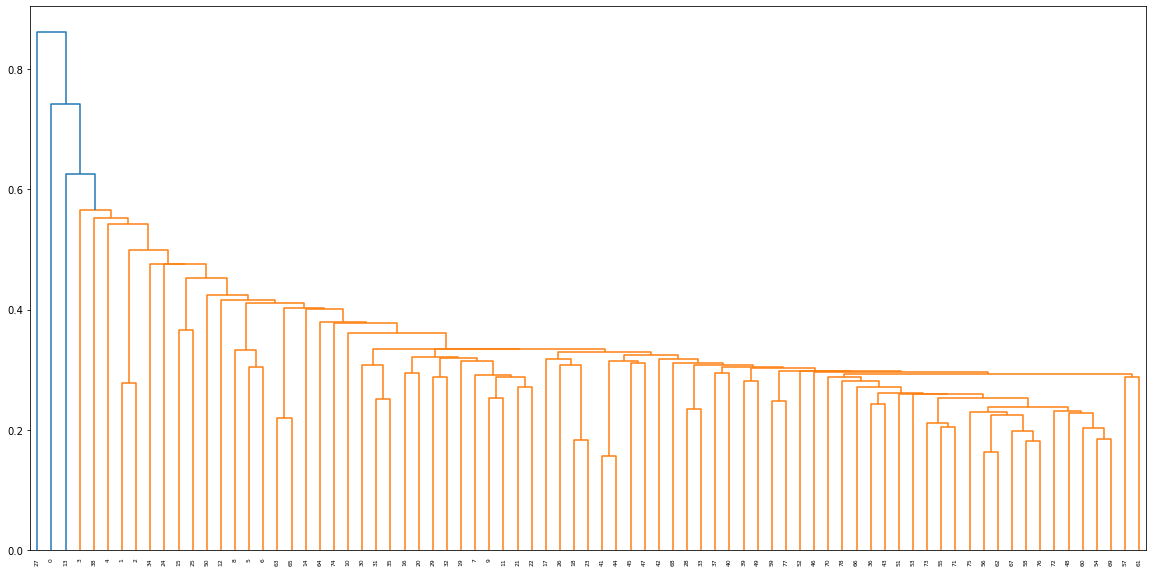

In [52]:
# Single linkage
plt.figure(figsize = (20,10))
sin_data = linkage(data1, method='single',metric='euclidean')
dendrogram(sin_data)
plt.show()

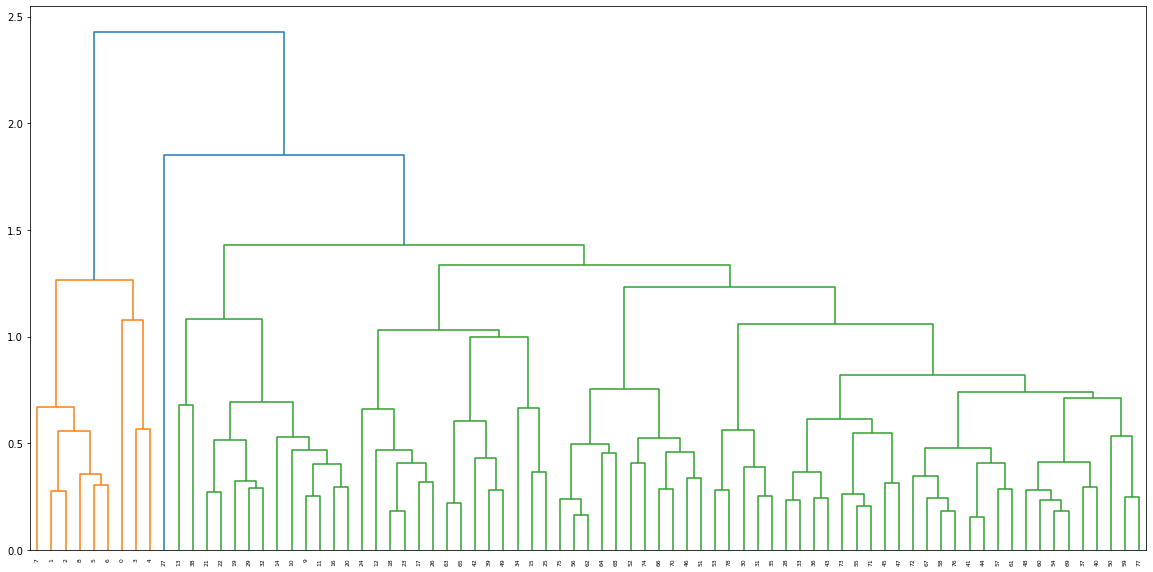

In [54]:
plt.figure(figsize = (20,10))
comp_data = linkage(data1, method='complete',metric='euclidean')
dendrogram(comp_data)
plt.show()